# The pyabf Cookbook: Using `ABF.memtest`

This page demonstrates how to access the abf membrane test data. For theoretical details about membrane properties, how to measure them, and how to computationally create and analyze membrane test data see the [membrane test theory and simulation](memtest-simulation.ipynb) page.

For more resources, see the pyABF project website: http://www.GitHub.com/swharden/pyABF

### Common variables:
* $ I_{h} $ - average clamp current at the holding voltage (a.k.a. holding current)
* $ C_{m} $ - membrane capacitance
* $ R_{a} $ - access resistance (synonymous with series resistance)
* $ R_{m} $ - membrane resistance (the true property of the cell membrane)
* $ \tau $ - (tau) the time constant of the decay curve of a current transient in response to a voltage step

###  Prepare the Environment:

In [1]:
# prepare the environment
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

###  Load the ABF Class

In [2]:
import sys
sys.path.insert(0, '../src/')
import pyabf
pyabf.info()

pyabf 0.1.4 was imported from C:\Users\scott\Documents\GitHub\pyABF\src\pyabf


### Import a Recording
_Membrane tests can be analyzed from any episodic voltage clamp recording with a hyperpolarizing current step at the start of every sweep_

This ABF has 187 sweeps


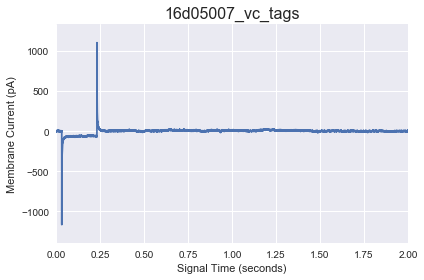

In [3]:
abf=pyabf.ABF("../data/16d05007_vc_tags.abf")
print("This ABF has %d sweeps"%abf.sweepCount)
plt.plot(abf.dataX,abf.dataY)
abf.plotDecorate()

### Calculate $I_{h}$, $R_{m}$, $R_{a}$, $C_{m}$, and $\tau$ for Every Sweep

In [4]:
abf.memtestAnalyzeAll()

### Display Memtest Averages

In [5]:
print("Ih:", abf.memtest.Ih.average, abf.memtest.Ih.units)
print("Ra:", abf.memtest.Ra.average, abf.memtest.Ra.units)
print("Rm:", abf.memtest.Rm.average, abf.memtest.Rm.units)
print("Cm:", abf.memtest.Cm.average, abf.memtest.Cm.units)
print("Tau:", abf.memtest.Tau.average, abf.memtest.Tau.units)

Ih: 35.0228064772 pA
Ra: 7.05271050172 MOhm
Rm: 165.566419111 MOhm
Cm: 226.252527971 pF
Tau: 1.59364790122 ms


### Display Memtest Values per Sweep

In [6]:
print(abf.memtest.Ih)

array([  3.597,   5.85 ,   6.705,  10.278,  10.42 ,   7.291,   5.605,
        17.65 ,  14.525,  11.832,  17.731,  23.289,  20.621,  22.801,
        24.929,  27.924,  23.792,  25.982,  26.719,  27.073,  31.428,
        29.898,  30.746,  32.62 ,  33.483,  33.558,  34.334,  33.765,
        34.783,  35.515,  36.696,  36.926,  35.68 ,  33.658,  37.676,
        36.16 ,  36.8  ,  34.581,  34.859,  36.574,  37.926,  34.758,
        38.247,  39.671,  35.643,  30.394,  34.903,  33.555,  32.702,
        39.729,  35.832,  31.962,  36.729,  38.073,  30.859,  36.36 ,
        36.835,  36.835,  35.743,  36.578,  37.191,  34.768,  38.811,
        38.98 ,  37.651,  39.971,  38.384,  36.567,  36.309,  37.382,
        39.664,  41.707,  36.771,  36.984,  39.821,  34.745,  38.037,
        39.115,  38.617,  37.513,  35.79 ,  37.499,  35.796,  37.698,
        38.427,  38.451,  38.552,  36.978,  38.49 ,  35.712,  38.369,
        38.786,  37.912,  43.17 ,  41.452,  35.871,  40.341,  42.63 ,
        38.451,  38.

### Plot Memtest Information

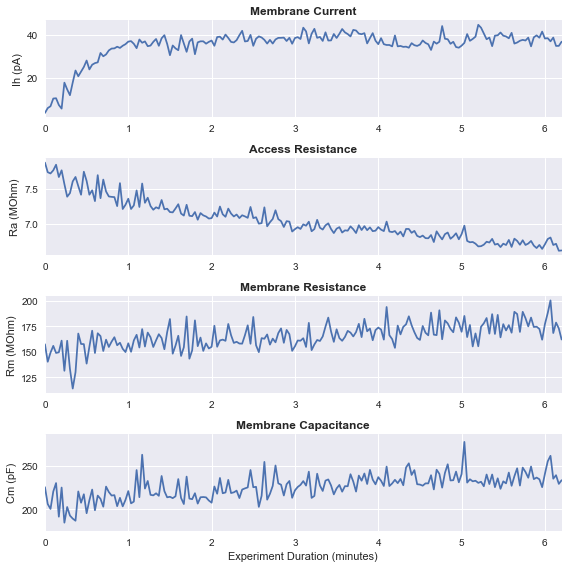

In [10]:
plt.figure(figsize=(8,8))

ax1=plt.subplot(411)
plt.plot(abf.sweepTimesMin,abf.memtest.Ih)
plt.title(abf.memtest.Ih.desc, fontweight='bold')
plt.ylabel(abf.memtest.Ih.label)


plt.subplot(412,sharex=ax1)
plt.plot(abf.sweepTimesMin,abf.memtest.Ra)
plt.title(abf.memtest.Ra.desc, fontweight='bold')
plt.ylabel(abf.memtest.Ra.label)

plt.subplot(413,sharex=ax1)
plt.plot(abf.sweepTimesMin,abf.memtest.Rm)
plt.title(abf.memtest.Rm.desc, fontweight='bold')
plt.ylabel(abf.memtest.Rm.label)


plt.subplot(414,sharex=ax1)
plt.plot(abf.sweepTimesMin,abf.memtest.Cm)
plt.title(abf.memtest.Cm.desc, fontweight='bold')
plt.ylabel(abf.memtest.Cm.label)
plt.xlabel("Experiment Duration (minutes)")

plt.margins(0,.1)
plt.tight_layout()